# Implementing Callbacks

- In this exercise, we will train out model 
- During the end of each epoch the `on_epoch_end` function is called from the defined `myCallback` class
- If the Desired accuracy is attained, then the model training is brought to a halt

In [1]:
import tensorflow as tf

print(tf.__version__)

2.10.0


### Importing the data set:

- Let us now import the data using the `fasion_mnist` dataset from `tensorflow.keras.datasets` library

In [2]:
fmnist=tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_labels),(testing_images,testing_labels)=fmnist.load_data()

Let us have a look at the first data Item

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

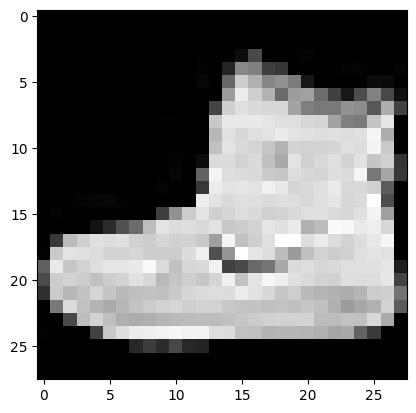

In [4]:
import numpy as np
import matplotlib.pyplot as plt

index=0

np.set_printoptions(linewidth=320)

print(f"LABEL: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n {training_images[index]}")

plt.imshow(training_images[index],cmap='gray')

### Normalization

- Normalization is very important for the efficient computation of weights and biases in our neural networks
- They help in emphasising equal representation of features in the neural network and also support easy implementation of reularization of parameters

In [5]:
training_images=training_images/255
testing_images=testing_images/255

### Softmax Funtion

- Softmax funtion uses the array of input values and outputs the probabibility of occurence of each
- It does so by taking `z= w.x +b` values applying the softmax function on them

softmax function: `np.exp(z1)/np.sum(np.exp(z1)+np.exp(z2)+...+np.exp(zn))`

In [6]:
inputs=np.array([[1.0,2.0,3.0,4.0]])
inputs=tf.convert_to_tensor(inputs)
print(f"Inputs to softmax function: {inputs.numpy()}")

outputs=tf.keras.activations.softmax(inputs)
print(f"Outputs from softmax funtion: {outputs.numpy()}")

sum=tf.reduce_sum(outputs)
print(f"Sum of outputs: {sum}")

prediction=np.argmax(outputs)
print(f"Class with highest probability: {prediction}")

Inputs to softmax function: [[1. 2. 3. 4.]]
Outputs from softmax funtion: [[0.0320586  0.08714432 0.23688282 0.64391426]]
Sum of outputs: 1.0
Class with highest probability: 3


### Callbacks:

- Callbacks can be used for early termination of the training process
- The training can be terminated by setting the `seft.model.stop_training` parameter to `True`
- Usual implementations include calling the `Callback` after each epoch execution

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.91):
            print("\nRequired Accuracy reached!")
            self.model.stop_training=True

callbacks=myCallback()
            

### Neural Network Architecture:

- Here the network comprises of;
    1. `Flatten()`
    2. `Dense(units=layer1,activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.000001))`
    3. `Dense(units=10,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.000001))`
- The model is the compiled with;
    1. loss=`SparseCategoricalCrossentropy()`
    2. optimizer=`Adam()`
    3. metrics=`['accuracy']`
- Finally the model is trained with the `x` and `y` labels and the resulting network is evaluated using the `evaluate` function 

In [9]:
layer1=1024

tf.random.set_seed(1)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=layer1,activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.000001)),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.000001))
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(training_images,training_labels,epochs=10,callbacks=[callbacks])

print(model.evaluate(training_images,training_labels))
print(model.evaluate(testing_images,testing_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4703 - accuracy: 0.8321
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3565 - accuracy: 0.8706
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3238 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3017 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2829 - accuracy: 0.8965
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2667 - accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2588 - accuracy: 0.9059
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2450 - accuracy: 0.9088
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9137
Required Accuracy reached!
1875/1875 [==============================] - 10s 5m